In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False

# 一

In [2]:
filename = 'RegData1.txt'
data = pd.read_csv(filename, header=None, names=['x', 'y'])
data.head()

,x,y
0,-1.0,2.10
1,-0.7,1.20
2,-0.4,0.38
3,-0.1,0.50
4,0.2,0.48


In [3]:
temp = data['x'].values
for i in [2, 3, 4, 5]:
    data.insert(data.shape[1], f'x^{i}', temp**i)
y = data.pop('y')
data.insert(data.shape[1], 'y', y)
data

,x,x^2,x^3,x^4,x^5,y
0,-1.00,1.0000,-1.000000,1.000000,-1.000000,2.10
1,-0.70,0.4900,-0.343000,0.240100,-0.168070,1.20
2,-0.40,0.1600,-0.064000,0.025600,-0.010240,0.38
3,-0.10,0.0100,-0.001000,0.000100,-0.000010,0.50
4,0.20,0.0400,0.008000,0.001600,0.000320,0.48
5,0.48,0.2304,0.110592,0.053084,0.025480,0.10
6,0.81,0.6561,0.531441,0.430467,0.348678,-0.40


Text(0, 0.5, 'y')

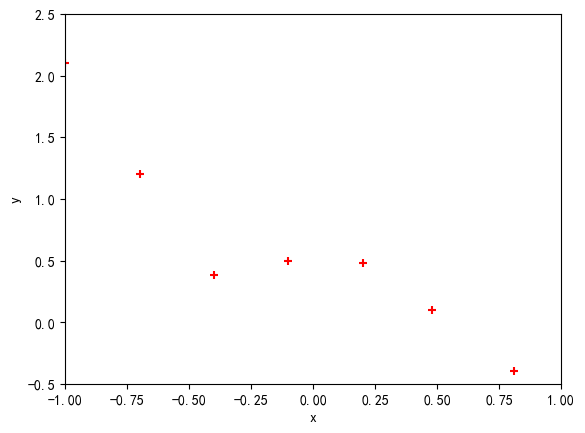

In [4]:
X = data.iloc[:, 0:-1].values
Y = data.iloc[:, -1].values

plt.scatter(X[:, 0], Y, marker='+', color='red')
plt.xlim([-1, 1])
plt.ylim([-0.5, 2.5])
plt.xlabel('x')
plt.ylabel('y')

### **Regularized cost function**

> - $$J(\theta)=\frac{1}{2*7}[\sum_{i=1}^7{(h_\theta(x^{(i)})-y^{(i)})^2}+\lambda\sum_{j=1}^{5}{\theta_j^2}] $$  
> - $$h_\theta(x)=\theta^T X=\theta_0+\theta_1x+\theta_2x^2+\theta_3x^3+\theta_4x^4+\theta_5x^5 $$  

### **The gradient of cost function**  

> - 当j=0时，$$\frac{\partial J(\theta)}{ \partial \theta_0} = \frac{1}{7} \sum_{i=1}^7{(h_\theta(X^{(i)})-y^{(i)})X^{(i)}_0}$$
> - 当j$\not=$0时，$$\frac{\partial J(\theta)}{ \partial \theta_j} = \frac{1}{7} [\sum_{i=1}^7{(h_\theta(X^{(i)})-y^{(i)})X^{(i)}_j}+\lambda \theta_j] $$
>  $$\Downarrow$$
> - $$\frac{\partial J(\theta)}{ \partial \theta}$$

### **The descent algorithm for the regularized linear regression**
> - 当i=0时  
>   $$\theta_0^{(k+1)} = \theta_0^{(k)} - \alpha \frac{1}{7} \sum_{i=1}^7{(h_\theta(X^{(i)})-y^{(i)})X^{(i)}_0}$$  
> - 当i$\not=$0时
>   $$\theta_i^{(k+1)} = \theta_i^{(k)} - \alpha \frac{1}{7} [\sum_{i=1}^7{(h_\theta(X^{(i)})-y^{(i)})X^{(i)}_j} + \lambda \theta_j^{(k)}]$$

In [5]:
X = data.iloc[:, 0:-1].values
Y = data.iloc[:, -1].values

X = sm.add_constant(X)

m, n = X.shape

In [6]:
# 梯度下降法， lamb为正则化参数，alpha为学习率，N为容许的最大迭代次数
def GD_linear(lamb, alpha, N, X, Y):
    tol = 1e-6; error = 1
    alpha = 0.5
    k = 0
    theta_old = np.zeros(n)
    theta_new = np.zeros(n)
    I = np.eye(n)
    I[0, 0] = 0

    while error>tol and k<N:
        summation = np.zeros((n, ))
        for j in range(m):
            summation = summation + (np.matmul(theta_old, X[j, :])-Y[j])*X[j, :] + lamb/m * (theta_old@I)
        theta_new = theta_old - alpha*(1.0/m)*summation
        k = k + 1
        error = np.max(np.abs(theta_new - theta_old))
        theta_old = theta_new
    return (theta_new, error, k)

In [7]:
# 画图
def Draw1(theta, lamb):
    x = np.linspace(-1, 1, 100)
    y_hat = []
    for i in x:
        temp = np.matmul(theta, [1, i, i**2, i**3, i**4, i**5])
        y_hat.append(temp)

    plt.scatter(data['x'].values, data['y'].values, marker='+', color='black')
    plt.plot(x, y_hat, 'blue')
    plt.legend(['Training data', f'5th order fit,λ={lamb}'])
    plt.xlim([-1, 1])
    plt.ylim([-0.5, 2.5])
    plt.xlabel('x')
    plt.ylabel('y')

    plt.show()

λ=1时，边界方程的系数为 [ 0.50435297  0.59393605 -1.36202228 -5.69897486  2.29972191  4.443965  ]
迭代次数为：53854


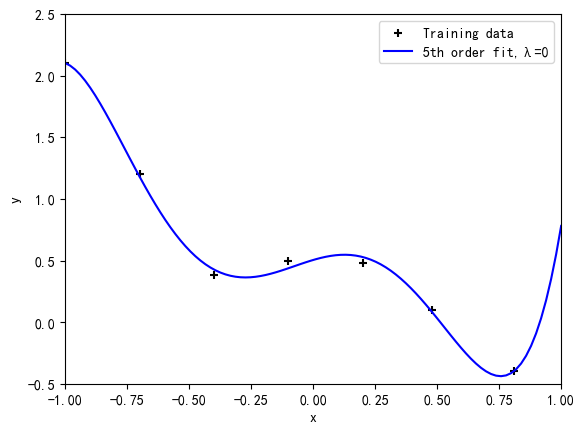

In [8]:
# lambda = 0时
theta, error, k = GD_linear(0, 0.5, 1e6, X, Y)
print('λ=1时，边界方程的系数为', theta)
print(f'迭代次数为：{k}')
Draw1(theta, 0)

λ=1时，边界方程的系数为 [ 0.41861259 -0.45403748  0.09888525 -0.40857929  0.15289556 -0.34107895]
迭代次数为：106


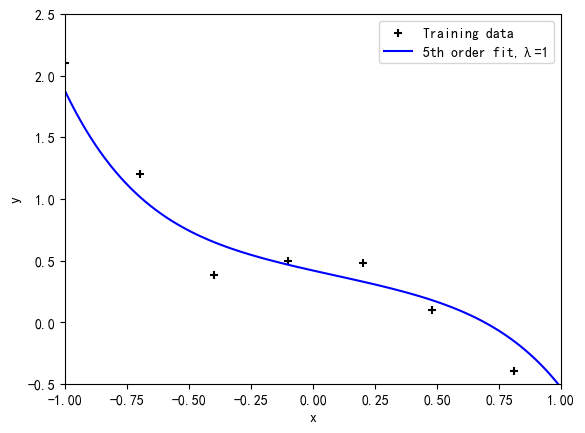

In [9]:
# lambda = 1时
theta, error, k = GD_linear(1, 0.5, 1e6, X, Y)
print('λ=1时，边界方程的系数为', theta)
print(f'迭代次数为：{k}')
Draw1(theta, 1)

λ=1时，边界方程的系数为 [ 0.53279894 -0.19013908  0.05756847 -0.15134565  0.07299586 -0.12934721]
迭代次数为：25


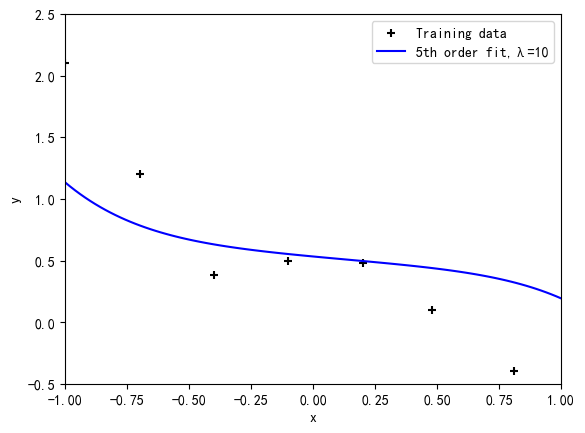

In [10]:
# lambda = 10时
theta, error, k = GD_linear(10, 0.5, 1e6, X, Y)
print('λ=1时，边界方程的系数为', theta)
print(f'迭代次数为：{k}')
Draw1(theta, 10)

# 二

In [11]:
filename = 'RegData2.txt'
data = pd.read_csv(filename, header=None, names=['x1', 'x2', 'y'])
data.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [12]:
Y_0 = data[data['y']==0].values
Y_1 = data[data['y']==1].values

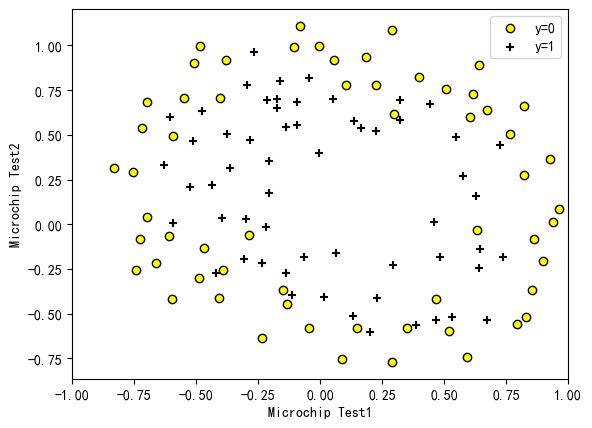

In [13]:
# 散点图
plt.scatter(Y_0[:, 0], Y_0[:, 1], marker='o', edgecolor='black', facecolor='yellow') 
plt.scatter(Y_1[:, 0], Y_1[:, 1], marker='+', color='black')
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.xlim([-1, 1])
plt.legend(['y=0', 'y=1'])

In [14]:
df = data[['x1', 'x2']]
x1 = df['x1'].values
x2 = df['x2'].values
for i in range(2, 7):
    for j in range(0, i+1):
        temp = x1**(i-j) * x2**(j)
        df.insert(df.shape[1], f'x1$^{i-j}$x2$^{j}$', temp)
df

,x1,x2,x1$^2$x2$^0$,x1$^1$x2$^1$,x1$^0$x2$^2$,x1$^3$x2$^0$,x1$^2$x2$^1$,x1$^1$x2$^2$,x1$^0$x2$^3$,x1$^4$x2$^0$,...,x1$^2$x2$^3$,x1$^1$x2$^4$,x1$^0$x2$^5$,x1$^6$x2$^0$,x1$^5$x2$^1$,x1$^4$x2$^2$,x1$^3$x2$^3$,x1$^2$x2$^4$,x1$^1$x2$^5$,x1$^0$x2$^6$
0,0.051267,0.699560,0.002628,0.035864,0.489384,1.347453e-04,0.001839,0.025089,0.342354,6.907989e-06,...,0.000900,1.227829e-02,1.675424e-01,1.815630e-08,2.477505e-07,3.380660e-06,4.613055e-05,6.294709e-04,8.589398e-03,1.172060e-01
1,-0.092742,0.684940,0.008601,-0.063523,0.469143,-7.976812e-04,0.005891,-0.043509,0.321335,7.397855e-05,...,0.002764,-2.041205e-02,1.507518e-01,6.362953e-07,-4.699318e-06,3.470651e-05,-2.563226e-04,1.893054e-03,-1.398103e-02,1.032560e-01
2,-0.213710,0.692250,0.045672,-0.147941,0.479210,-9.760555e-03,0.031616,-0.102412,0.331733,2.085928e-03,...,0.015151,-4.907685e-02,1.589699e-01,9.526844e-05,-3.085938e-04,9.995978e-04,-3.237900e-03,1.048821e-02,-3.397345e-02,1.100469e-01
3,-0.375000,0.502190,0.140625,-0.188321,0.252195,-5.273438e-02,0.070620,-0.094573,0.126650,1.977539e-02,...,0.017810,-2.385083e-02,3.194040e-02,2.780914e-03,-3.724126e-03,4.987251e-03,-6.678793e-03,8.944062e-03,-1.197765e-02,1.604015e-02
4,-0.513250,0.465640,0.263426,-0.238990,0.216821,-1.352032e-01,0.122661,-0.111283,0.100960,6.939303e-02,...,0.026596,-2.412849e-02,2.189028e-02,1.827990e-02,-1.658422e-02,1.504584e-02,-1.365016e-02,1.238395e-02,-1.123519e-02,1.019299e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,-0.720620,0.538740,0.519293,-0.388227,0.290241,-3.742131e-01,0.279764,-0.209153,0.156364,2.696654e-01,...,0.081199,-6.070482e-02,4.538330e-02,1.400354e-01,-1.046913e-01,7.826790e-02,-5.851357e-02,4.374511e-02,-3.270412e-02,2.444980e-02
114,-0.593890,0.494880,0.352705,-0.293904,0.244906,-2.094682e-01,0.174547,-0.145447,0.121199,1.244011e-01,...,0.042748,-3.562096e-02,2.968243e-02,4.387691e-02,-3.656200e-02,3.046659e-02,-2.538737e-02,2.115493e-02,-1.762810e-02,1.468924e-02
115,-0.484450,0.999270,0.234692,-0.484096,0.998541,-1.136964e-01,0.234520,-0.483743,0.997812,5.508024e-02,...,0.234178,-4.830370e-01,9.963553e-01,1.292688e-02,-2.666414e-02,5.499985e-02,-1.134476e-01,2.340073e-01,-4.826843e-01,9.956280e-01
116,-0.006336,0.999270,0.000040,-0.006332,0.998541,-2.544062e-07,0.000040,-0.006327,0.997812,1.612020e-09,...,0.000040,-6.317918e-03,9.963553e-01,6.472253e-14,-1.020695e-11,1.609667e-09,-2.538495e-07,4.003286e-05,-6.313306e-03,9.956280e-01


- $\theta^TX = \theta_0 + \theta_1x_1 + \theta_2x_2$   
$+\theta_3x_1^2 + \theta_4x_1x_2 +\theta_5x_2^2$  
$+\theta_6x_1^3 +\theta_7x_1^2x_2 +\theta_8x_1x_2^2 +\theta_9x_2^3$  
$+\theta_{10}x_1^4 +\theta_{11}x_1^3x_2 +\theta_{12}x_1^2x_2^2 +\theta_{13}x_1x_2^3 +\theta_{14}x_2^4$  
$+\theta_{15}x_1^5 +\theta_{16}x_1^4x_2 +\theta_{17}x_1^3x_2^2 +\theta_{18}x_1^2x_2^3 +\theta_{19}x_1x_2^4 +\theta_{20}x_2^5$  
$+\theta_{21}x_1^6 +\theta_{22}x_1^5x_2 +\theta_{23}x_1^4x_2^2 +\theta_{24}x_1^3x_2^3 +\theta_{25}x_1^2x_2^4 +\theta_{26}x_1x_2^5 +\theta_{27}x_2^6$

###  **The Regularized cost function**
> - $$J(\theta)=\frac{1}{m}\sum_{i=1}^m{[y^{(i)}\log{h_\theta(x^{(i)})} + (1-y^{(i)})\log{(1-h_\theta(x^{(i)}))}]} + \frac{\lambda}{2m}\sum_{j=1}^n{\theta^2} $$
> - $$h_\theta(X) = \frac{1}{1+e^{(\theta^TX)}} $$

### **The gradients of the cost function**

> - 当j=0时，$$\frac{\partial J(\theta)}{ \partial \theta_0} = \frac{1}{m} \sum_{i=1}^m{(h_\theta(X^{(i)})-y^{(i)})X^{(i)}_0}$$
> - 当j$\not=$0时，$$\frac{\partial J(\theta)}{ \partial \theta_j} = \frac{1}{m} [\sum_{i=1}^m{(h_\theta(X^{(i)})-y^{(i)})X^{(i)}_j}+\lambda \theta_j] $$
>  $$\Downarrow$$
> - $$\frac{\partial J(\theta)}{ \partial \theta}$$

In [15]:
X = df.values
Y = data['y'].values
X = sm.add_constant(X) 

m, n = X.shape

In [16]:
# 定义多项式
def poly(x1, x2, theta):
    temp = theta[0]
    k = 1
    for i in range(1, 7):
        for j in range(0, i+1):
            temp += theta[k] * x1**(i-j) * x2**(j)
            k += 1
    return temp

In [17]:
# cost function & sigma function
def g(theta, x):
    gz = 1 / (1+np.e**(-theta.T@x))
    return gz

In [18]:
# 梯度下降法， lamb为正则化参数，alpha为学习率，N为容许的最大迭代次数
def GD2(lamb, alpha, N, X, Y):
    tol = 1e-4;error = 1
    k = 0
    theta_old = np.zeros(n)
    theta_new = np.zeros(n)
    I = np.eye(n)
    I[0, 0] = 0
    
    while error>tol and k<N:
        summation = np.zeros((n, ))
        # 求梯度（偏导数）
        for i in range(m):
            summation = summation + (g(theta_old, X[i, :]) - Y[i])*X[i, :] + lamb/m * (theta_old@I)
        theta_new = theta_old - alpha*(1.0/m)*summation

        k = k + 1
        error = np.max(np.abs(theta_new - theta_old))
        theta_old = theta_new
    return (theta_new, error, k)

In [19]:
np.set_printoptions(precision=4, suppress=True)

In [20]:
# lambda=0
theta, error, k = GD2(0, 0.5, 5e6, X, Y)
print('λ=0时，边界方程的系数为', theta)
print(f'迭代次数为：{k}')

λ=0时，边界方程的系数为 [  4.0276   1.4455   5.448   -6.2725  -8.9377  -4.656    3.7144   2.6265
   6.6028  -4.6706  -2.3541   4.69    -6.2585  -1.4476 -11.9334  -2.9827
  -2.3924  11.1512  -6.3925  -9.3419   7.215   -8.8623  -1.626   -0.77
   7.3604  -9.6573  -7.2648   1.0041]
迭代次数为：64293


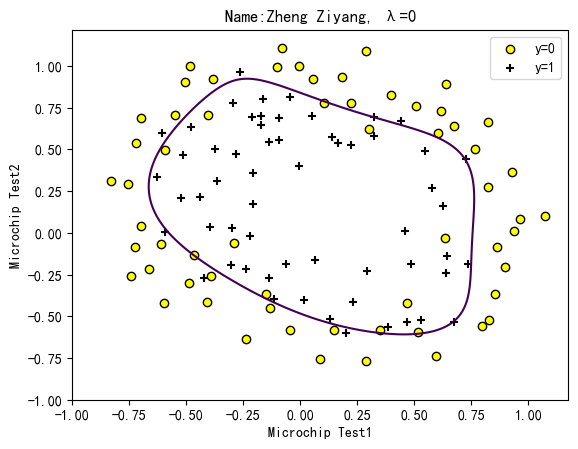

In [21]:
# 散点图
plt.scatter(Y_0[:, 0], Y_0[:, 1], marker='o', edgecolor='black', facecolor='yellow') 
plt.scatter(Y_1[:, 0], Y_1[:, 1], marker='+', color='black')
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')

# 创建x和y的值
x1 = np.linspace(-1, 1, 400)
x2 = np.linspace(-1, 1, 400)
X1, X2 = np.meshgrid(x1, x2)

Z = poly(X1, X2, theta)

# 绘制等高线图
plt.contour(X1, X2, Z, levels=[0], cmap='viridis')

plt.legend(['y=0', 'y=1'])
plt.title('Name:Zheng Ziyang, λ=0')

plt.show()

In [22]:
# lambda=1
theta, error, k = GD2(1, 0.5, 1e5, X, Y)
print('λ=0时，边界方程的系数为', theta)
print(f'迭代次数为：{k}')

λ=0时，边界方程的系数为 [ 1.2661  0.6218  1.1775 -2.0101 -0.9078 -1.4125  0.1234 -0.365  -0.3589
 -0.1745 -1.4561 -0.0558 -0.6137 -0.2719 -1.1904 -0.2413 -0.2073 -0.0488
 -0.2759 -0.2941 -0.463  -1.0429  0.0239 -0.2924  0.0128 -0.3263 -0.1421
 -0.9318]
迭代次数为：783


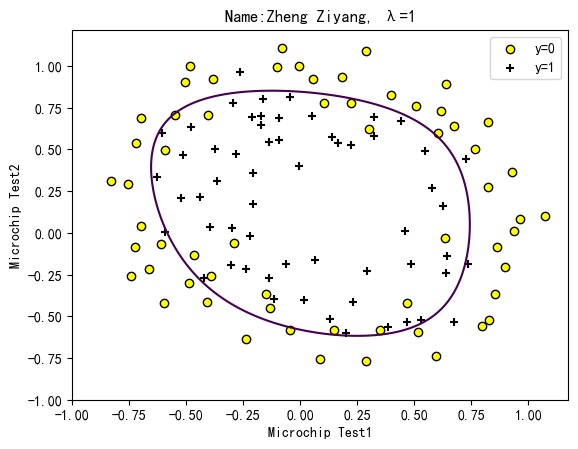

In [23]:
# 散点图
plt.scatter(Y_0[:, 0], Y_0[:, 1], marker='o', edgecolor='black', facecolor='yellow') 
plt.scatter(Y_1[:, 0], Y_1[:, 1], marker='+', color='black')
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')

# 创建x和y的值
x1 = np.linspace(-1, 1, 400)
x2 = np.linspace(-1, 1, 400)
X1, X2 = np.meshgrid(x1, x2)

Z = poly(X1, X2, theta)

# 绘制等高线图
plt.contour(X1, X2, Z, levels=[0], cmap='viridis')

plt.legend(['y=0', 'y=1'])
plt.title('Name:Zheng Ziyang, λ=1')

plt.show()

In [24]:
# lambda=100
theta, error, k = GD2(100, 0.5, 1e5, X, Y)
print('λ=100时，边界方程的系数为', theta)
print(f'迭代次数为：{k}')

λ=100时，边界方程的系数为 [ 0.0211 -0.0175  0.0057 -0.0551 -0.0132 -0.0385 -0.0184 -0.0077 -0.0089
 -0.0228 -0.0434 -0.0024 -0.0141 -0.0035 -0.0414 -0.021  -0.0047 -0.0036
 -0.0063 -0.005  -0.032  -0.0341 -0.0011 -0.007  -0.0004 -0.008  -0.0015
 -0.0411]
迭代次数为：33


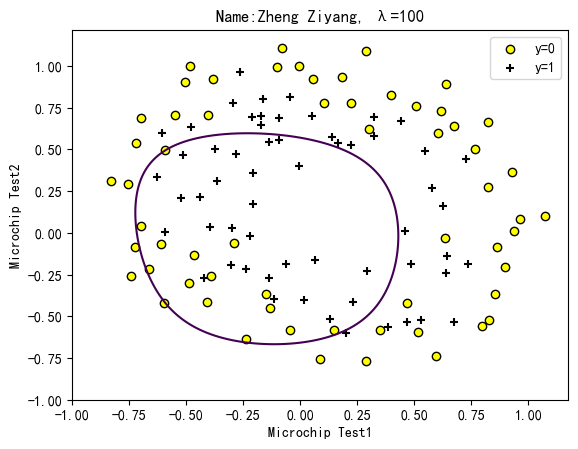

In [25]:
# 散点图
fig1 = plt.scatter(Y_0[:, 0], Y_0[:, 1], marker='o', edgecolor='black', facecolor='yellow') 
fig2 = plt.scatter(Y_1[:, 0], Y_1[:, 1], marker='+', color='black')
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')

# 创建x和y的值
x1 = np.linspace(-1, 1, 400)
x2 = np.linspace(-1, 1, 400)
X1, X2 = np.meshgrid(x1, x2)

Z = poly(X1, X2, theta)

# 绘制等高线图
fig3 = plt.contour(X1, X2, Z, levels=[0], cmap='viridis')

plt.legend(['y=0', 'y=1'])
plt.title('Name:Zheng Ziyang, λ=100')

plt.show()